In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [71]:
training_df, testing_df = pd.read_csv("training.csv"), pd.read_csv("testing.csv")

In [72]:
training_df = pd.concat([training_df, testing_df], ignore_index=True)

In [73]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [74]:
training_df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.395643,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.266795,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.189918,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.335778,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.597671,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


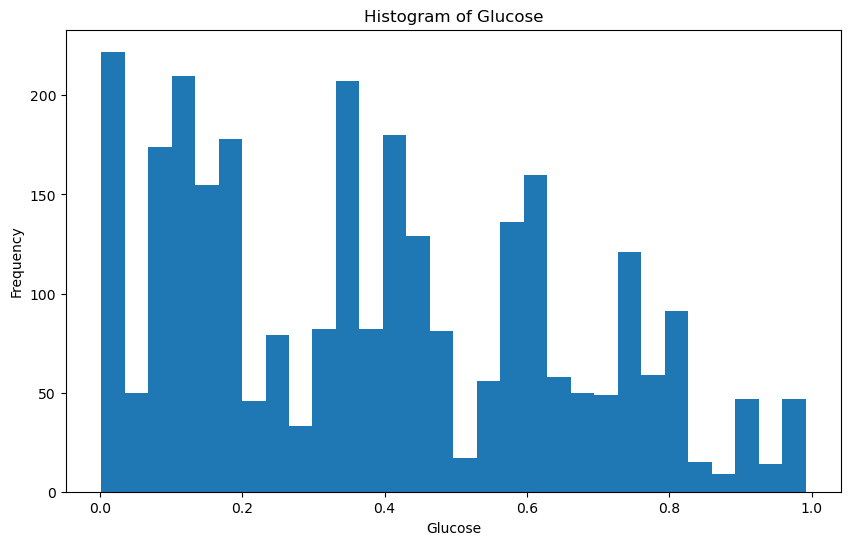

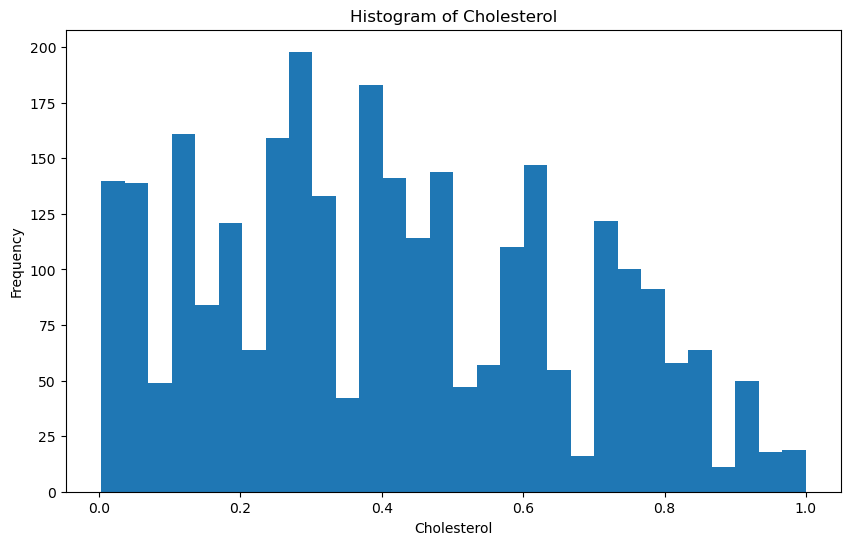

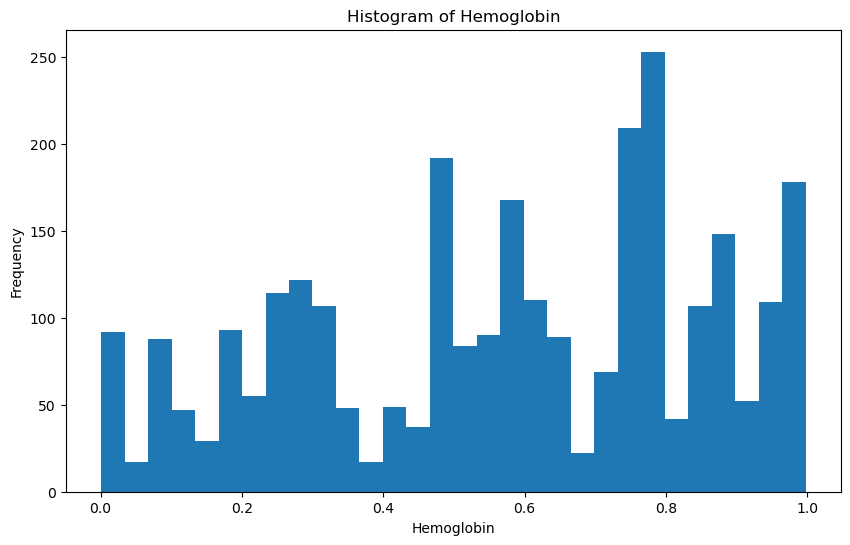

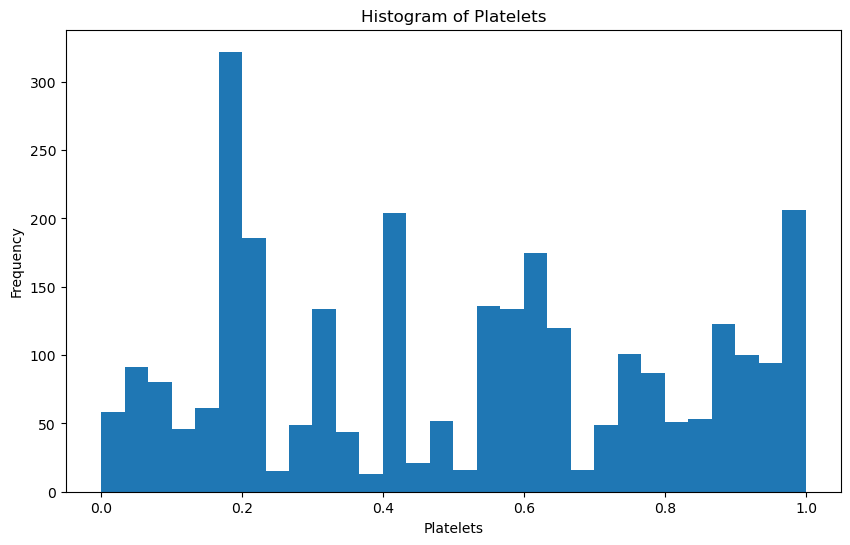

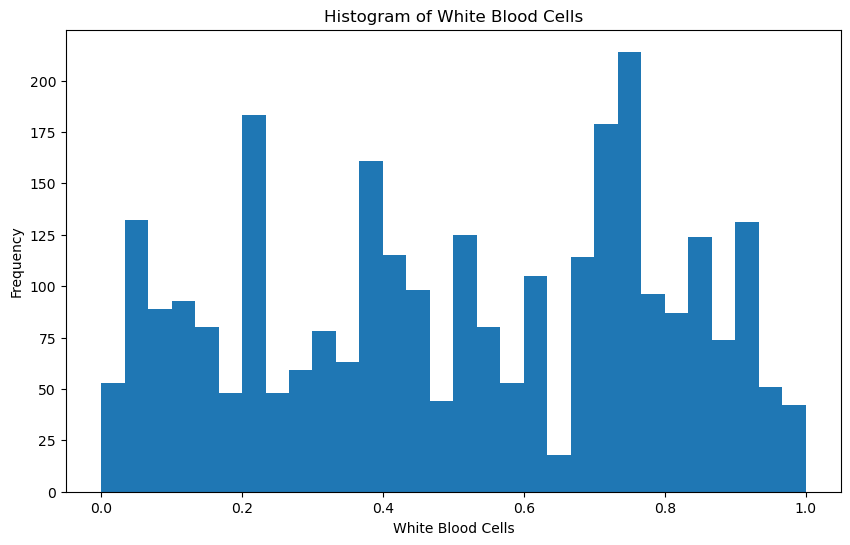

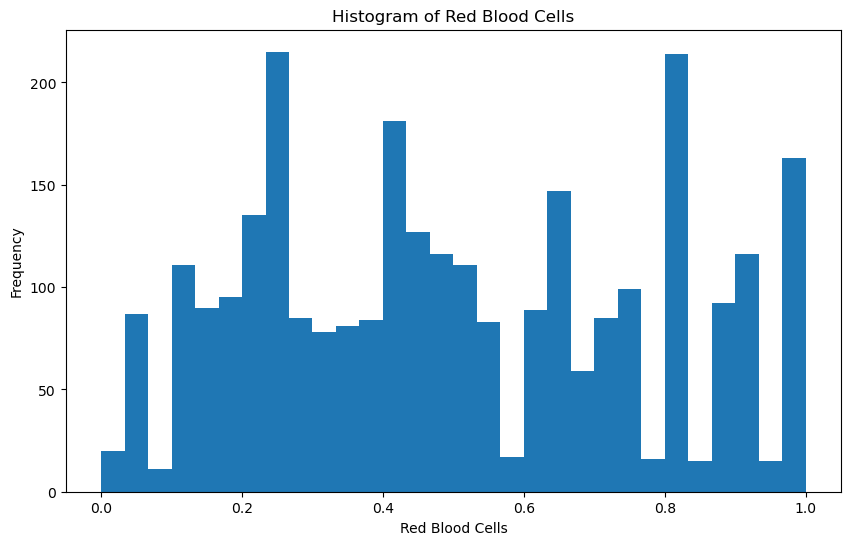

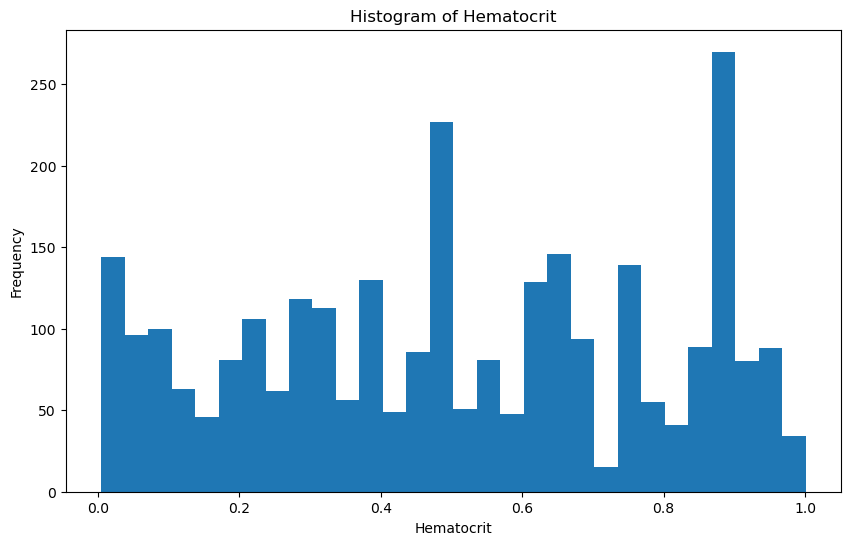

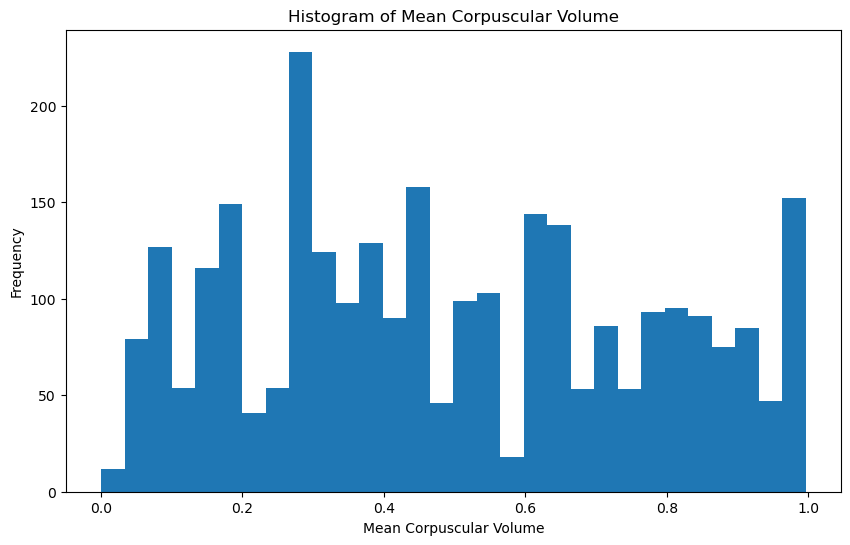

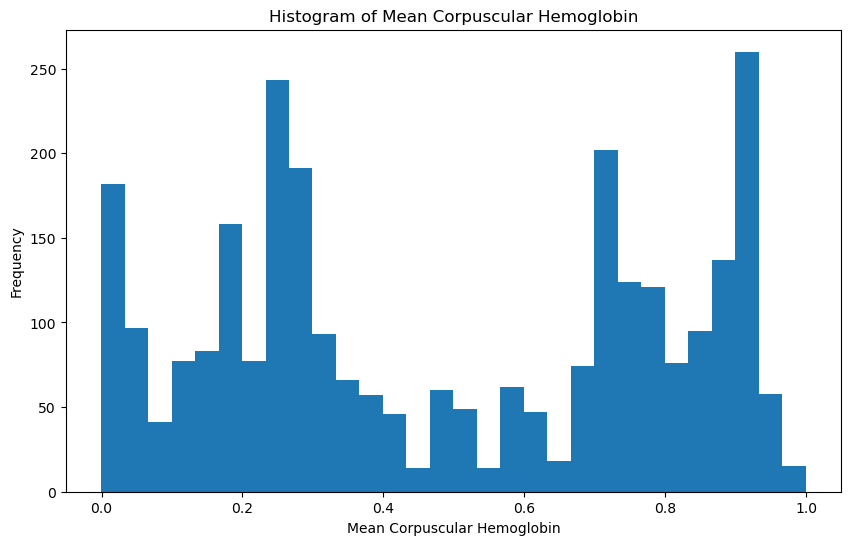

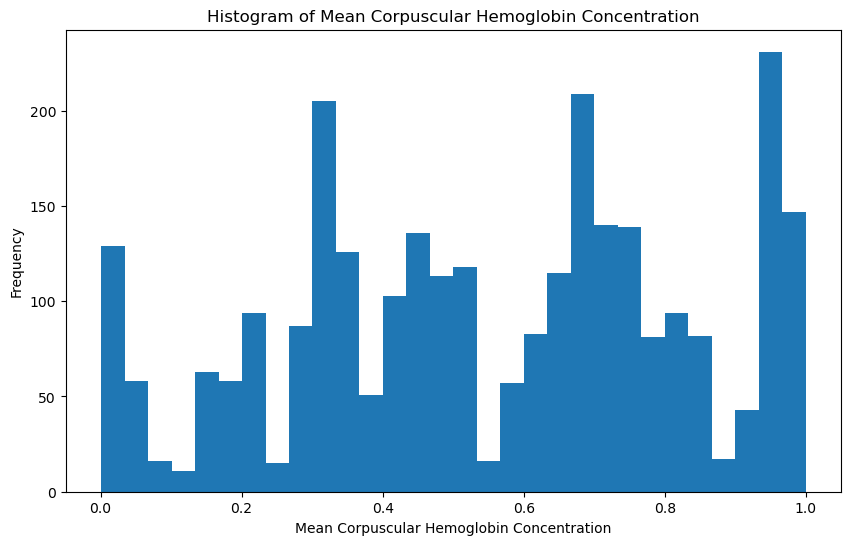

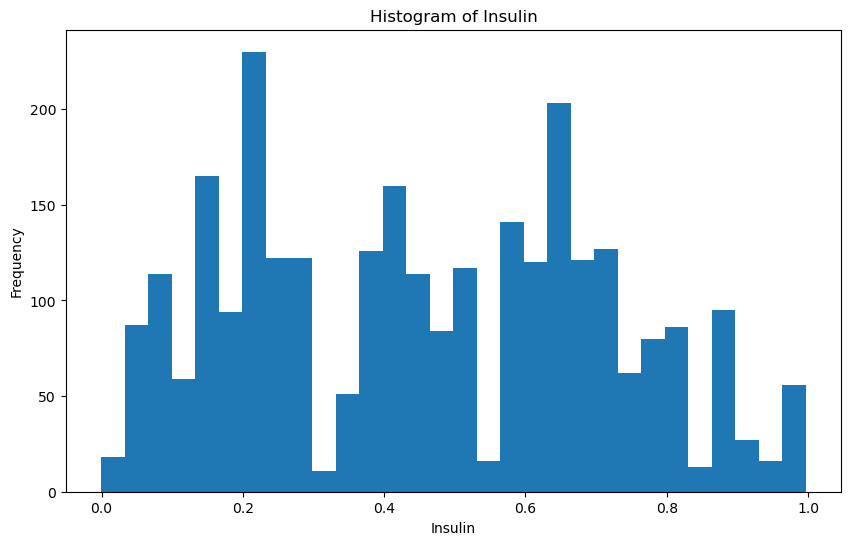

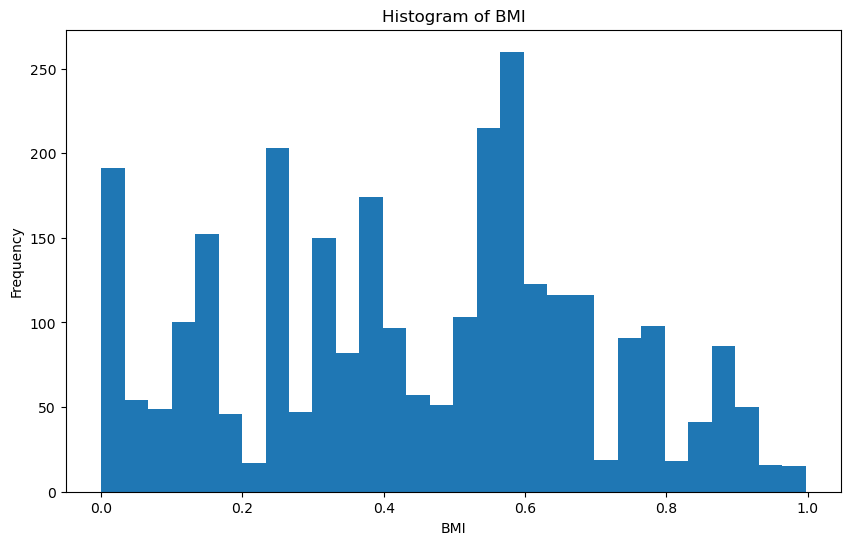

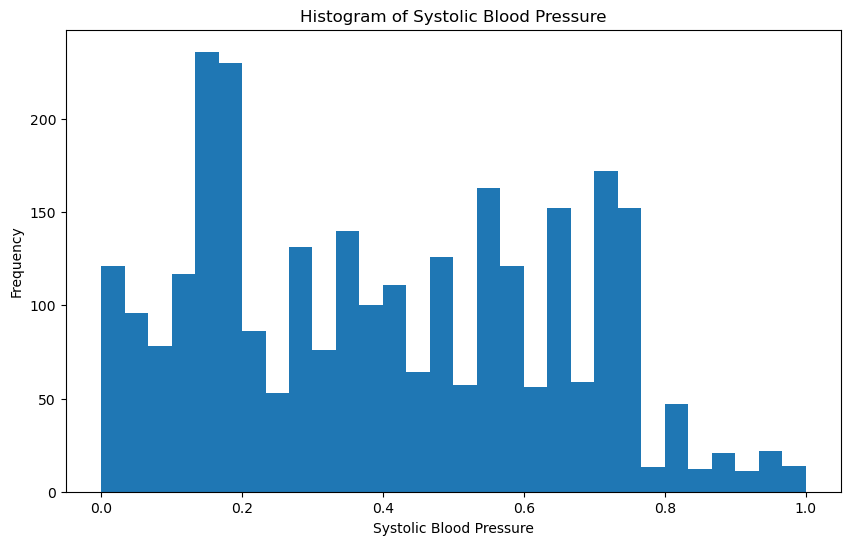

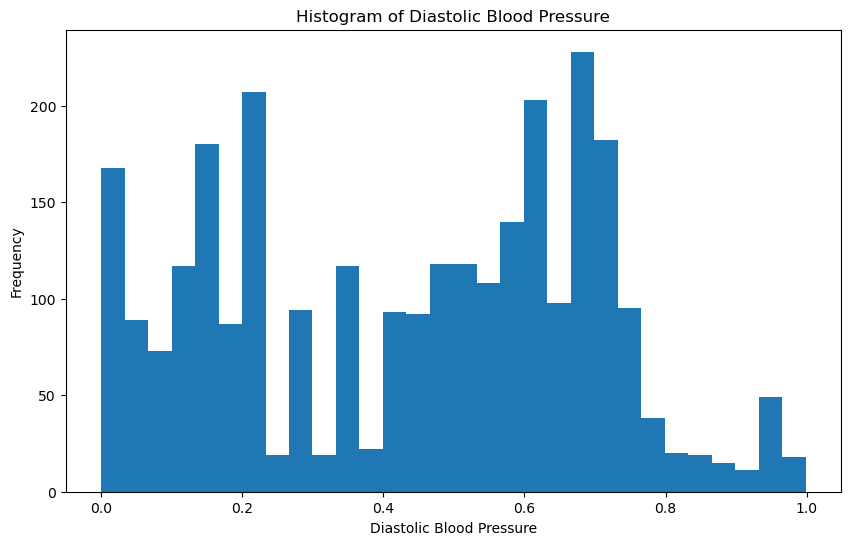

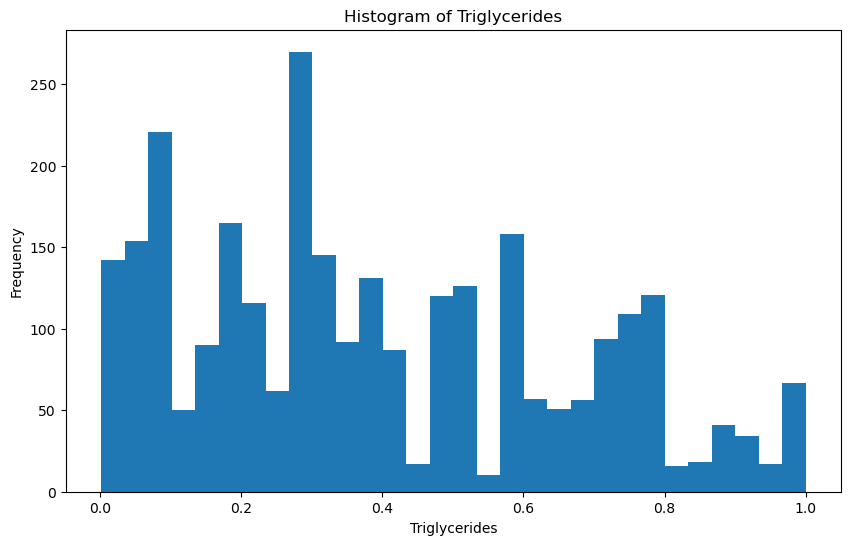

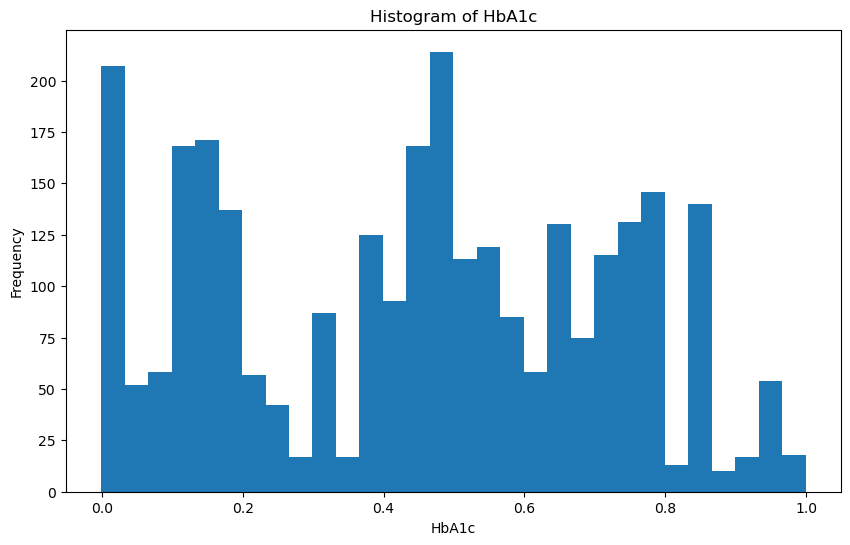

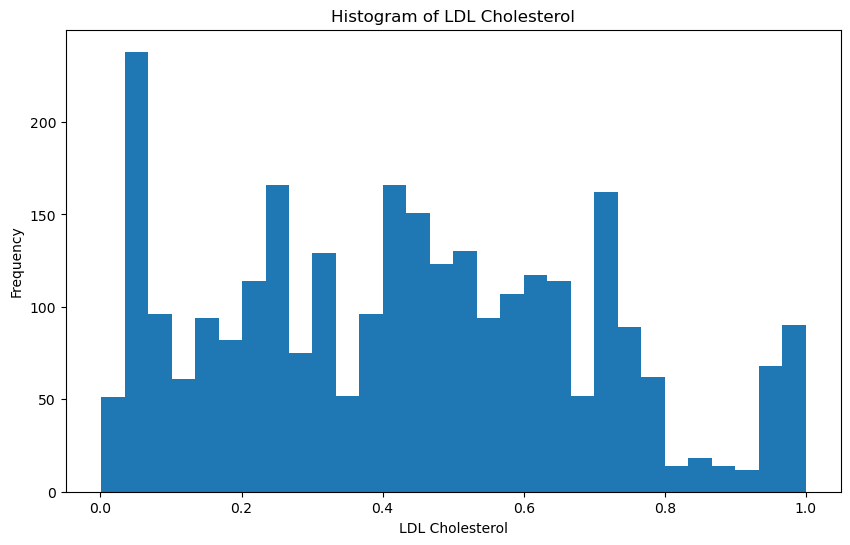

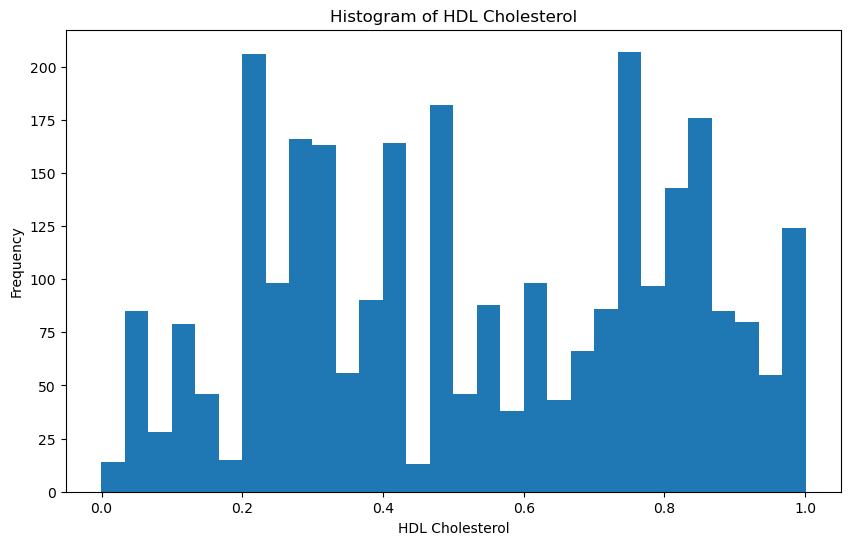

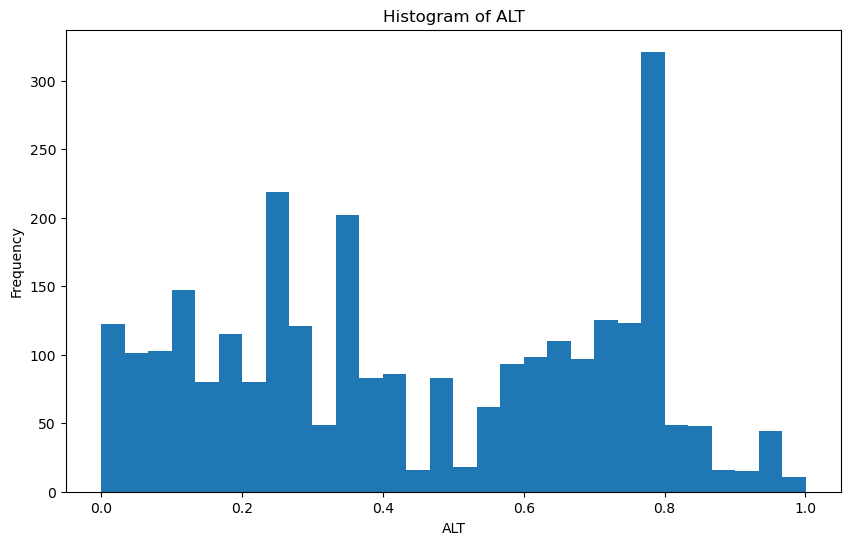

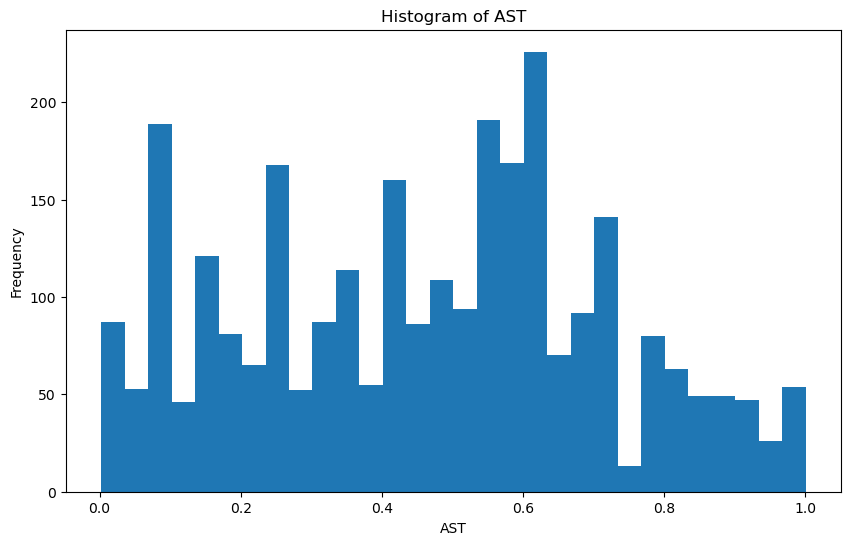

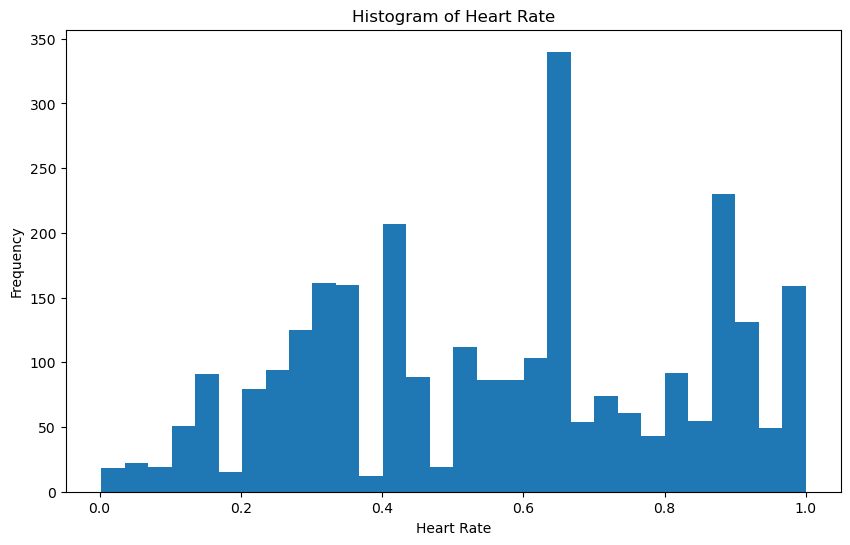

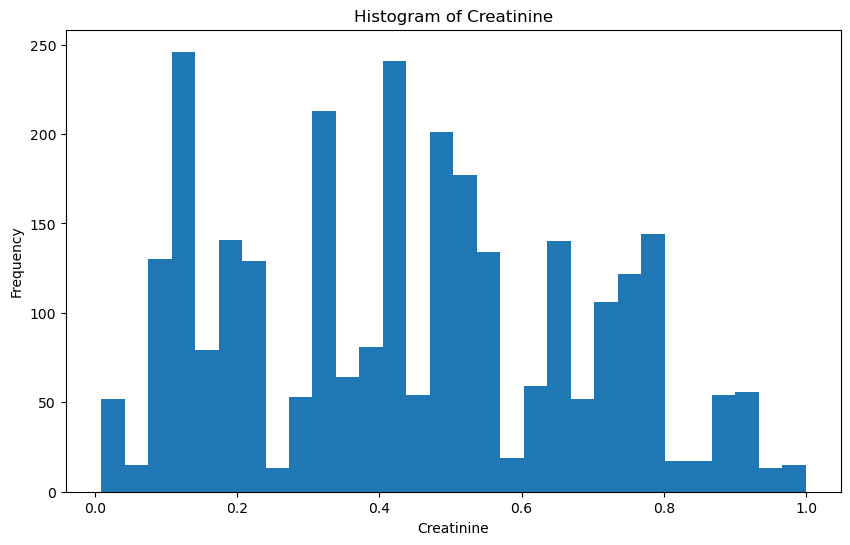

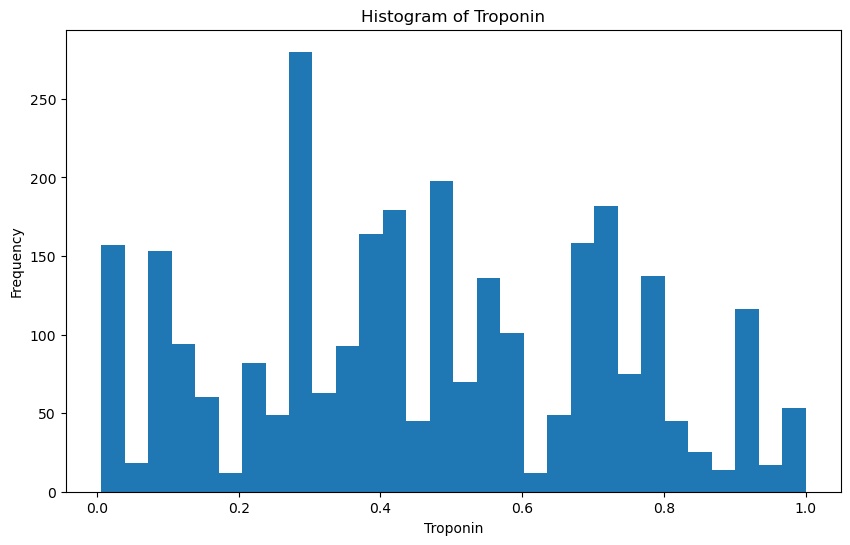

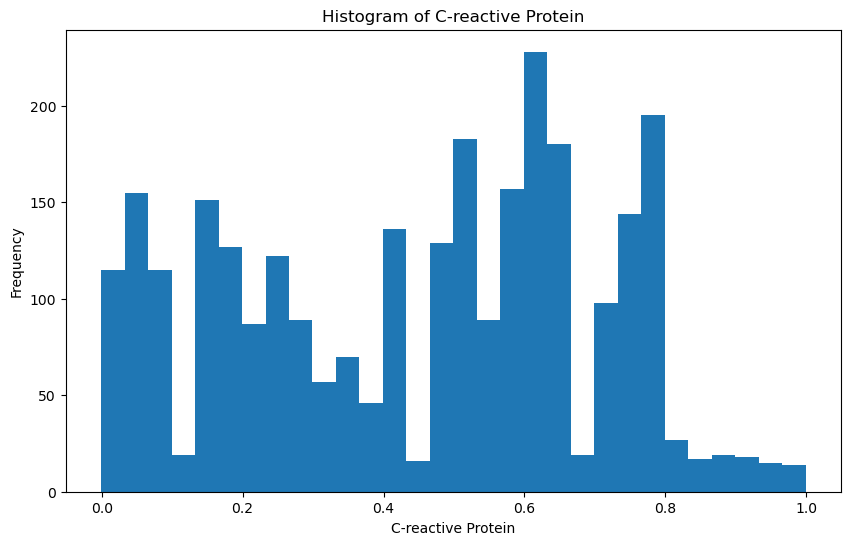

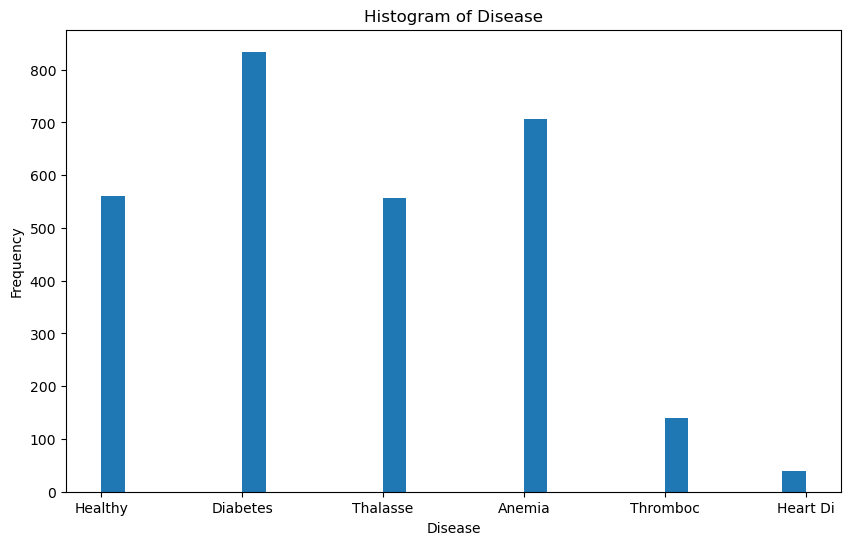

In [75]:
for column in training_df.columns:
    plt.figure(figsize=(10, 6))
    training_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

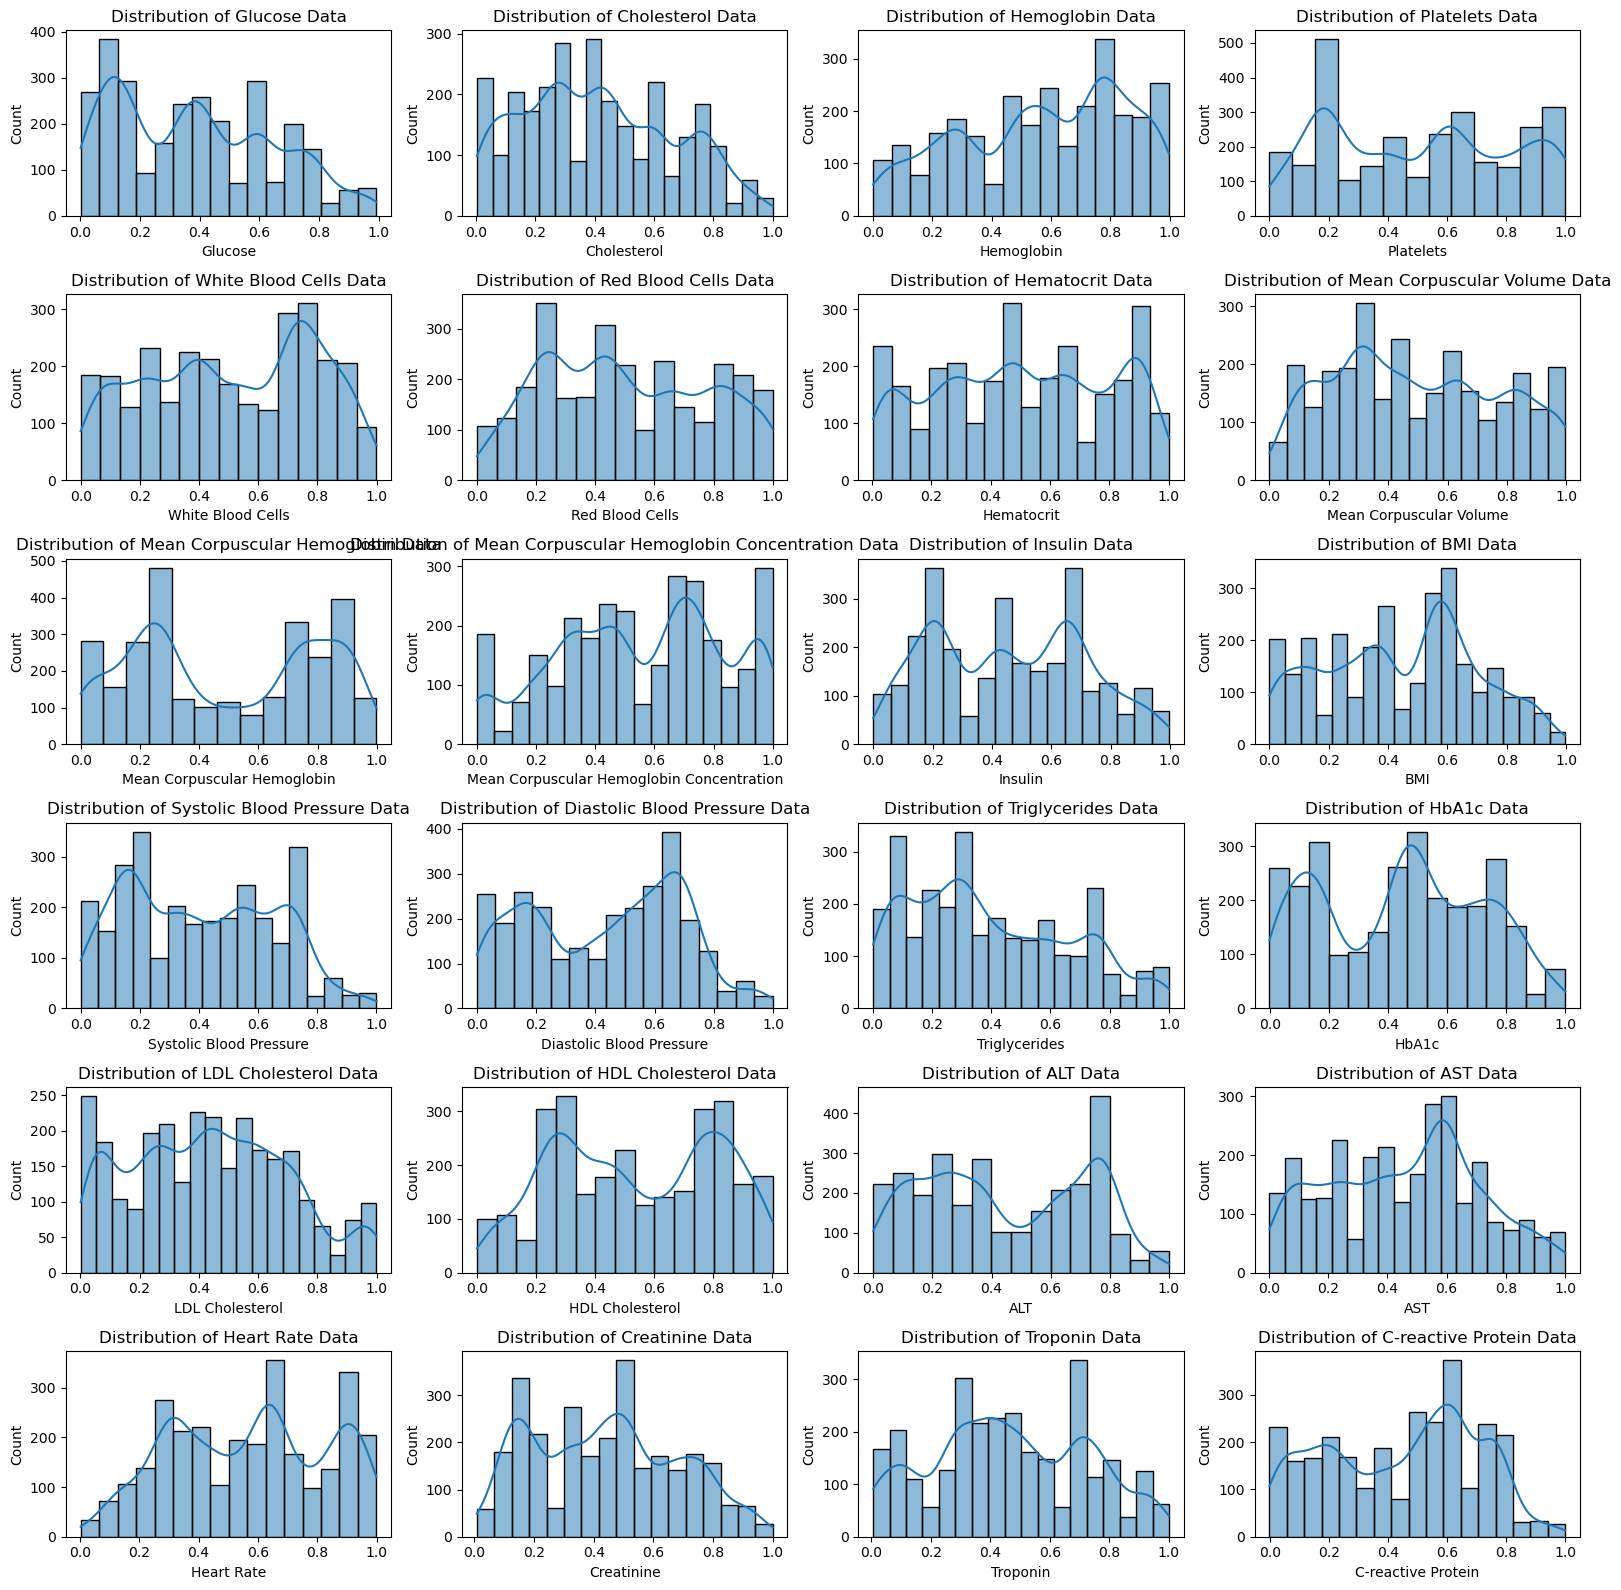

In [76]:
plt.figure(figsize = (16, 16))
num_plots = len(training_df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(training_df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(training_df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

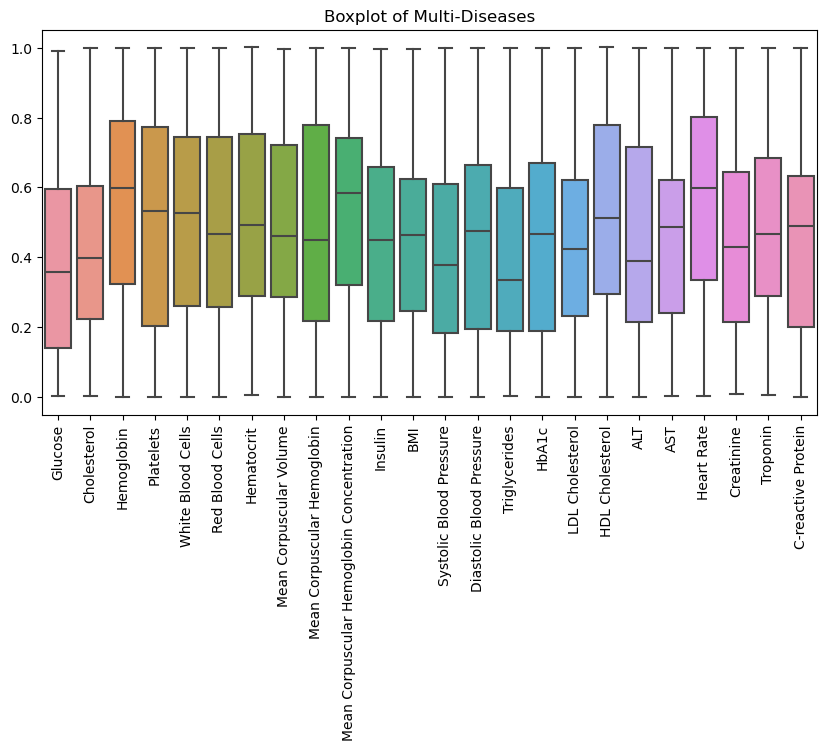

In [77]:

plt.figure(figsize = (10, 5))
sns.boxplot(training_df[training_df.columns[:-1]])
plt.title("Boxplot of Multi-Diseases")
plt.xticks(rotation = 90)
plt.show()

In [78]:
X, y = training_df.drop("Disease", axis=1), training_df["Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [79]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_scaled, y_train_encoded)

y_predictions = logistic_regression.predict(X_test_scaled)
  
accuracy = accuracy_score(y_test_encoded,y_predictions)
  
print(classification_report(y_test_encoded,y_predictions))

print(f"The Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       141
           1       0.83      0.86      0.84       166
           2       0.89      0.85      0.87       119
           3       0.00      0.00      0.00         8
           4       0.92      0.84      0.88       110
           5       0.84      0.88      0.86        24

    accuracy                           0.86       568
   macro avg       0.72      0.73      0.72       568
weighted avg       0.86      0.86      0.86       568

The Accuracy: 0.8591549295774648


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
